## Logistic Regression using Pyspark MLlib

# 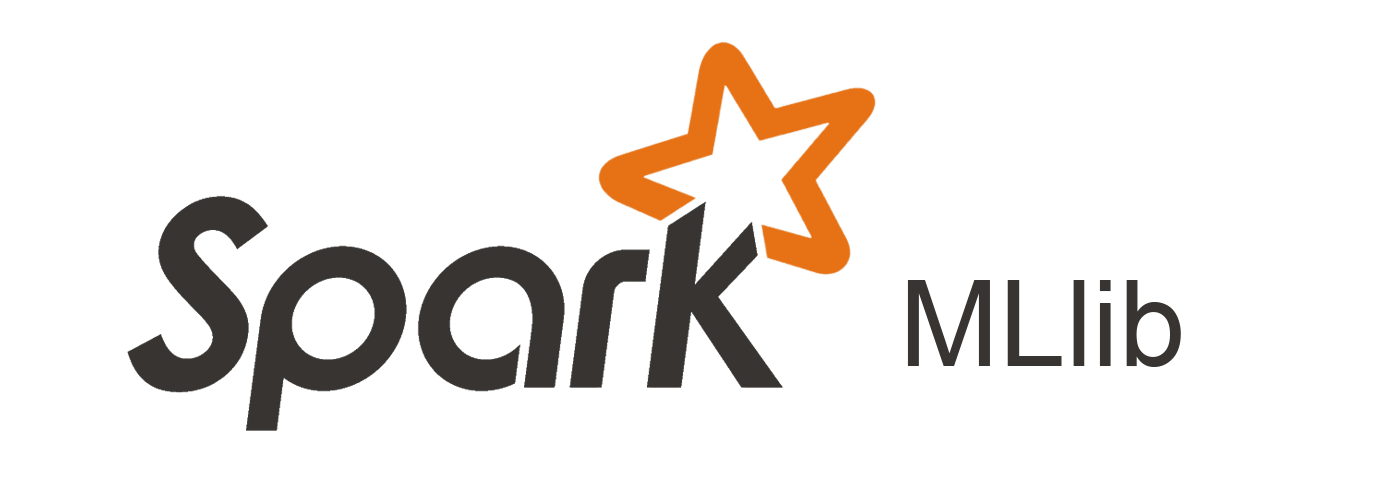

- Logistic regression is an example of supervised learning. 
- It is used to calculate or predict the probability of a binary (yes/no) event occurring.
- An example of logistic regression could be applying machine learning to determine
- if a person is likely to be diseased with heart or not.

In [1]:
#### Import the required modules

In [2]:
import pyspark

In [3]:
import pyspark.sql.functions as F
## ctreate the app for spark 
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('logistic').getOrCreate()

In [4]:
spark

In [5]:
## Read the dataset
df = spark.read.csv('heart_disease.csv',header=True,inferSchema=True)
df.show()

+---+------+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+
|Age|Gender|ChestPainType|RestingBP|Cholesterol|FastingBS|RestingECG|MaxHR|ExerciseAngina|Oldpeak|ST_Slope|HeartDisease|
+---+------+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+
| 40|     M|          ATA|      140|        289|        0|    Normal|  172|             N|    0.0|      Up|           0|
| 49|     F|          NAP|      160|        180|        0|    Normal|  156|             N|    1.0|    Flat|           1|
| 37|     M|          ATA|      130|        283|        0|        ST|   98|             N|    0.0|      Up|           0|
| 48|     F|          ASY|      138|        214|        0|    Normal|  108|             Y|    1.5|    Flat|           1|
| 54|     M|          NAP|      150|        195|        0|    Normal|  122|             N|    0.0|      Up|           0|
| 39|     M|          NAP|      

## Data Preprocessiong 

In [6]:
df.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- ChestPainType: string (nullable = true)
 |-- RestingBP: integer (nullable = true)
 |-- Cholesterol: integer (nullable = true)
 |-- FastingBS: integer (nullable = true)
 |-- RestingECG: string (nullable = true)
 |-- MaxHR: integer (nullable = true)
 |-- ExerciseAngina: string (nullable = true)
 |-- Oldpeak: double (nullable = true)
 |-- ST_Slope: string (nullable = true)
 |-- HeartDisease: integer (nullable = true)



In [7]:
# check the dataset rows and columns
print(df.count())
print(len(df.columns))

918
12


In [8]:
# check the data types in data
df.dtypes

[('Age', 'int'),
 ('Gender', 'string'),
 ('ChestPainType', 'string'),
 ('RestingBP', 'int'),
 ('Cholesterol', 'int'),
 ('FastingBS', 'int'),
 ('RestingECG', 'string'),
 ('MaxHR', 'int'),
 ('ExerciseAngina', 'string'),
 ('Oldpeak', 'double'),
 ('ST_Slope', 'string'),
 ('HeartDisease', 'int')]

In [9]:
# we will check the dataset columns names
df.columns 

['Age',
 'Gender',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

In [10]:
## Groupby the HeartDisease for the count  0 or 1
df.groupBy('HeartDisease').count().show()

+------------+-----+
|HeartDisease|count|
+------------+-----+
|           1|  508|
|           0|  410|
+------------+-----+



In [11]:
df.groupBy('Age').count().show()

+---+-----+
|Age|count|
+---+-----+
| 31|    2|
| 65|   21|
| 53|   33|
| 34|    7|
| 28|    1|
| 76|    2|
| 44|   19|
| 47|   19|
| 52|   36|
| 40|   13|
| 57|   38|
| 54|   51|
| 48|   31|
| 64|   22|
| 41|   24|
| 43|   24|
| 37|   11|
| 61|   31|
| 72|    4|
| 35|   11|
+---+-----+
only showing top 20 rows



In [12]:
df.groupBy('gender').count().show()

+------+-----+
|gender|count|
+------+-----+
|     F|  193|
|     M|  725|
+------+-----+



In [13]:
df.groupBy('ChestPainType').count().show()

+-------------+-----+
|ChestPainType|count|
+-------------+-----+
|          NAP|  203|
|          ATA|  173|
|           TA|   46|
|          ASY|  496|
+-------------+-----+



In [14]:
df.columns

['Age',
 'Gender',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

In [15]:
df.groupBy('RestingECG').count().show()

+----------+-----+
|RestingECG|count|
+----------+-----+
|       LVH|  188|
|    Normal|  552|
|        ST|  178|
+----------+-----+



In [16]:
df.groupBy('ExerciseAngina').count().show()

+--------------+-----+
|ExerciseAngina|count|
+--------------+-----+
|             Y|  371|
|             N|  547|
+--------------+-----+



In [17]:
df.groupBy('ST_Slope').count().show()

+--------+-----+
|ST_Slope|count|
+--------+-----+
|    Flat|  460|
|      Up|  395|
|    Down|   63|
+--------+-----+



In [18]:
df.na.drop().show()

+---+------+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+
|Age|Gender|ChestPainType|RestingBP|Cholesterol|FastingBS|RestingECG|MaxHR|ExerciseAngina|Oldpeak|ST_Slope|HeartDisease|
+---+------+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+
| 40|     M|          ATA|      140|        289|        0|    Normal|  172|             N|    0.0|      Up|           0|
| 49|     F|          NAP|      160|        180|        0|    Normal|  156|             N|    1.0|    Flat|           1|
| 37|     M|          ATA|      130|        283|        0|        ST|   98|             N|    0.0|      Up|           0|
| 48|     F|          ASY|      138|        214|        0|    Normal|  108|             Y|    1.5|    Flat|           1|
| 54|     M|          NAP|      150|        195|        0|    Normal|  122|             N|    0.0|      Up|           0|
| 39|     M|          NAP|      

In [19]:
df.count()

918

### Handling Categorical Data

In [20]:
## importing the StringIndexer
from pyspark.ml.feature import StringIndexer

In [21]:
df.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- ChestPainType: string (nullable = true)
 |-- RestingBP: integer (nullable = true)
 |-- Cholesterol: integer (nullable = true)
 |-- FastingBS: integer (nullable = true)
 |-- RestingECG: string (nullable = true)
 |-- MaxHR: integer (nullable = true)
 |-- ExerciseAngina: string (nullable = true)
 |-- Oldpeak: double (nullable = true)
 |-- ST_Slope: string (nullable = true)
 |-- HeartDisease: integer (nullable = true)



In [22]:
## we have to convert the categorical data to numerict (str to int) 
# Gender
indexer = StringIndexer(inputCol='Gender',outputCol='Gender_int')
indexed = indexer.fit(df).transform(df)

In [23]:
indexed.show(truncate=False)

+---+------+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+----------+
|Age|Gender|ChestPainType|RestingBP|Cholesterol|FastingBS|RestingECG|MaxHR|ExerciseAngina|Oldpeak|ST_Slope|HeartDisease|Gender_int|
+---+------+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+----------+
|40 |M     |ATA          |140      |289        |0        |Normal    |172  |N             |0.0    |Up      |0           |0.0       |
|49 |F     |NAP          |160      |180        |0        |Normal    |156  |N             |1.0    |Flat    |1           |1.0       |
|37 |M     |ATA          |130      |283        |0        |ST        |98   |N             |0.0    |Up      |0           |0.0       |
|48 |F     |ASY          |138      |214        |0        |Normal    |108  |Y             |1.5    |Flat    |1           |1.0       |
|54 |M     |NAP          |150      |195        |0        |Normal    |122  |N

In [24]:
indexed.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- ChestPainType: string (nullable = true)
 |-- RestingBP: integer (nullable = true)
 |-- Cholesterol: integer (nullable = true)
 |-- FastingBS: integer (nullable = true)
 |-- RestingECG: string (nullable = true)
 |-- MaxHR: integer (nullable = true)
 |-- ExerciseAngina: string (nullable = true)
 |-- Oldpeak: double (nullable = true)
 |-- ST_Slope: string (nullable = true)
 |-- HeartDisease: integer (nullable = true)
 |-- Gender_int: double (nullable = false)



In [25]:
## we have to convert the categorical data to numerict (str to int) 
# Gender
indexer = StringIndexer(inputCols=['ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],
                        outputCols=['ChestPainType_int','RestingECG_int','ExerciseAngina_int','ST_Slope_int'])
indexed = indexer.fit(indexed).transform(indexed)

In [26]:
indexed.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- ChestPainType: string (nullable = true)
 |-- RestingBP: integer (nullable = true)
 |-- Cholesterol: integer (nullable = true)
 |-- FastingBS: integer (nullable = true)
 |-- RestingECG: string (nullable = true)
 |-- MaxHR: integer (nullable = true)
 |-- ExerciseAngina: string (nullable = true)
 |-- Oldpeak: double (nullable = true)
 |-- ST_Slope: string (nullable = true)
 |-- HeartDisease: integer (nullable = true)
 |-- Gender_int: double (nullable = false)
 |-- ChestPainType_int: double (nullable = false)
 |-- RestingECG_int: double (nullable = false)
 |-- ExerciseAngina_int: double (nullable = false)
 |-- ST_Slope_int: double (nullable = false)



In [27]:
# we have to shpw the data how was converted numerical data from cartegorical
indexed.show(vertical=True)  # vertical means data set is too long in horizontally so vertical is showing clearly

-RECORD 0--------------------
 Age                | 40     
 Gender             | M      
 ChestPainType      | ATA    
 RestingBP          | 140    
 Cholesterol        | 289    
 FastingBS          | 0      
 RestingECG         | Normal 
 MaxHR              | 172    
 ExerciseAngina     | N      
 Oldpeak            | 0.0    
 ST_Slope           | Up     
 HeartDisease       | 0      
 Gender_int         | 0.0    
 ChestPainType_int  | 2.0    
 RestingECG_int     | 0.0    
 ExerciseAngina_int | 0.0    
 ST_Slope_int       | 1.0    
-RECORD 1--------------------
 Age                | 49     
 Gender             | F      
 ChestPainType      | NAP    
 RestingBP          | 160    
 Cholesterol        | 180    
 FastingBS          | 0      
 RestingECG         | Normal 
 MaxHR              | 156    
 ExerciseAngina     | N      
 Oldpeak            | 1.0    
 ST_Slope           | Flat   
 HeartDisease       | 1      
 Gender_int         | 1.0    
 ChestPainType_int  | 1.0    
 RestingEC

In [28]:
indexed.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- ChestPainType: string (nullable = true)
 |-- RestingBP: integer (nullable = true)
 |-- Cholesterol: integer (nullable = true)
 |-- FastingBS: integer (nullable = true)
 |-- RestingECG: string (nullable = true)
 |-- MaxHR: integer (nullable = true)
 |-- ExerciseAngina: string (nullable = true)
 |-- Oldpeak: double (nullable = true)
 |-- ST_Slope: string (nullable = true)
 |-- HeartDisease: integer (nullable = true)
 |-- Gender_int: double (nullable = false)
 |-- ChestPainType_int: double (nullable = false)
 |-- RestingECG_int: double (nullable = false)
 |-- ExerciseAngina_int: double (nullable = false)
 |-- ST_Slope_int: double (nullable = false)



In [29]:
## sepearate the data in independent and dependent with Vectorassembler
from pyspark.ml.feature import VectorAssembler

In [30]:
assembler = VectorAssembler(inputCols=['Age','RestingBP','Cholesterol','FastingBS',
                                       'MaxHR','Oldpeak','Gender_int','ChestPainType_int',
                                       'RestingECG_int','ExerciseAngina_int','ST_Slope_int'],
                           outputCol='features')

In [31]:
output = assembler.transform(indexed)

In [32]:
output.show(vertical=True,truncate=False)

-RECORD 0------------------------------------------------------------------
 Age                | 40                                                   
 Gender             | M                                                    
 ChestPainType      | ATA                                                  
 RestingBP          | 140                                                  
 Cholesterol        | 289                                                  
 FastingBS          | 0                                                    
 RestingECG         | Normal                                               
 MaxHR              | 172                                                  
 ExerciseAngina     | N                                                    
 Oldpeak            | 0.0                                                  
 ST_Slope           | Up                                                   
 HeartDisease       | 0                                                    
 Gender_int 

In [33]:
## we have to merge the final dataset dependent and indepentdent

In [34]:
final_data = output.select('features','HeartDisease')
final_data.show(vertical=True,truncate=False)

-RECORD 0------------------------------------------------------------
 features     | (11,[0,1,2,4,7,10],[40.0,140.0,289.0,172.0,2.0,1.0]) 
 HeartDisease | 0                                                    
-RECORD 1------------------------------------------------------------
 features     | [49.0,160.0,180.0,0.0,156.0,1.0,1.0,1.0,0.0,0.0,0.0] 
 HeartDisease | 1                                                    
-RECORD 2------------------------------------------------------------
 features     | [37.0,130.0,283.0,0.0,98.0,0.0,0.0,2.0,2.0,0.0,1.0]  
 HeartDisease | 0                                                    
-RECORD 3------------------------------------------------------------
 features     | [48.0,138.0,214.0,0.0,108.0,1.5,1.0,0.0,0.0,1.0,0.0] 
 HeartDisease | 1                                                    
-RECORD 4------------------------------------------------------------
 features     | (11,[0,1,2,4,7,10],[54.0,150.0,195.0,122.0,1.0,1.0]) 
 HeartDisease | 0   

## Splitting the data into train and test

In [35]:
## 75% train data and 25% test data
train_df,test_df = final_data.randomSplit([0.75,0.25])

In [36]:
train_df.count(),test_df.count()

(692, 226)

### Model Creation  using pyspark MLlib

In [37]:
# impoert the librarie
from pyspark.ml.classification import LogisticRegression
log_reg = LogisticRegression(featuresCol='features',labelCol='HeartDisease').fit(train_df)

In [38]:
log_reg

LogisticRegressionModel: uid=LogisticRegression_ab1ec7f871a5, numClasses=2, numFeatures=11

In [39]:
## prediction
train_pred = log_reg.evaluate(train_df).predictions

In [40]:
train_pred.show(vertical=True)

-RECORD 0-----------------------------
 features      | (11,[0,1,2,3,4],[... 
 HeartDisease  | 1                    
 rawPrediction | [-1.6449474013544... 
 probability   | [0.16179299253162... 
 prediction    | 1.0                  
-RECORD 1-----------------------------
 features      | (11,[0,1,2,3,4,5]... 
 HeartDisease  | 1                    
 rawPrediction | [-1.5110562255071... 
 probability   | [0.18078231333705... 
 prediction    | 1.0                  
-RECORD 2-----------------------------
 features      | (11,[0,1,2,3,4,5]... 
 HeartDisease  | 1                    
 rawPrediction | [-4.3162330063263... 
 probability   | [0.01317420197065... 
 prediction    | 1.0                  
-RECORD 3-----------------------------
 features      | (11,[0,1,2,3,4,7]... 
 HeartDisease  | 1                    
 rawPrediction | [-1.5059109806017... 
 probability   | [0.18154557640009... 
 prediction    | 1.0                  
-RECORD 4-----------------------------
 features      | (11,[0,1

In [41]:
result = log_reg.evaluate(test_df).predictions

In [42]:
result.show(5)

+--------------------+------------+--------------------+--------------------+----------+
|            features|HeartDisease|       rawPrediction|         probability|prediction|
+--------------------+------------+--------------------+--------------------+----------+
|(11,[0,1,2,3,4,5]...|           1|[-3.2155347384131...|[0.03858529006594...|       1.0|
|(11,[0,1,2,3,4,7]...|           1|[-1.2836383280536...|[0.21693153612203...|       1.0|
|(11,[0,1,2,3,4,8]...|           1|[-2.0093235983625...|[0.11822747429606...|       1.0|
|(11,[0,1,2,4],[44...|           1|[0.54455717261266...|[0.63287189397990...|       0.0|
|(11,[0,1,2,4],[46...|           1|[-0.6982816413435...|[0.33219332011143...|       1.0|
+--------------------+------------+--------------------+--------------------+----------+
only showing top 5 rows



## Prediction result out

In [43]:
result.select(['HeartDisease','prediction']).show(10)

+------------+----------+
|HeartDisease|prediction|
+------------+----------+
|           1|       1.0|
|           1|       1.0|
|           1|       1.0|
|           1|       0.0|
|           1|       1.0|
|           1|       1.0|
|           1|       1.0|
|           1|       1.0|
|           0|       0.0|
|           0|       0.0|
+------------+----------+
only showing top 10 rows



### confusion Matrix result

In [44]:
tp = result[(result.HeartDisease==1) &  (result.prediction==1.0)].count()
tp

106

In [45]:
tn = result[(result.HeartDisease==0) &  (result.prediction==0)].count()
tn

90

In [46]:
fp = result[(result.HeartDisease==0) &  (result.prediction==1)].count()
fp

9

In [47]:
fn = result[(result.HeartDisease==1) &  (result.prediction==0)].count()
fn

21

In [48]:
accuracy = float((tp+tn)/(result.count()))

In [49]:
print(accuracy)

0.8672566371681416


In [50]:
recall = float(tn)/(tp+tn)

In [51]:
print(recall)

0.45918367346938777
